<a href="https://colab.research.google.com/github/dhanushnayak/cancer_detection/blob/main/Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!wget https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip

--2022-10-21 19:00:13--  https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip [following]
--2022-10-21 19:00:14--  https://www.dropbox.com/s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4a8fb5fcaa1ca21e3acf7e9a53.dl.dropboxusercontent.com/cd/0/inline/BvTXo1eNgIRZnIql0jOZUj49YnJv9WqNRP8UAMbRUrAWGMY73NYjgX9z4JzTdWY0cza5e0AUOl61AEB3_3FNneh7eVc1ThNIJJTmpubKJ4CFoo7K8PHqZe3shNTrfMCfixm3Oe5w4DDZd8z8WJKMNcCYLfV01X_SRmRYkQE_R8V-bg/file# [following]
--2022-10-21 19:00:15--  https://uc4a8fb5fcaa1ca21e3acf7e9a53.dl.dropboxusercontent.com/cd/0/inline/BvTXo1eNgIRZnIql0jOZUj49YnJv9

In [3]:
!unzip "/content/brain_tumor data set.zip"
!rm "/content/brain_tumor data set.zip"

Archive:  /content/brain_tumor data set.zip
   creating: Brain Tumor Data Set/Brain Tumor/
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1005).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1006).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1007).jpg  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
import math
import imutils
import cv2

In [5]:
ROOT_DIR = "/content/Brain Tumor Data Set"
num_of_images = {}
for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

num_of_images

{'Healthey': 2087, 'Brain Tumor': 2513}

In [6]:
if not os.path.exists('./train'):
  os.mkdir('./train')
  for dir in os.listdir(ROOT_DIR):
    os.makedirs('./train/'+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(70/100*num_of_images[dir])-5),replace=False):
      O = os.path.join(ROOT_DIR,dir,img)
      D =  os.path.join('./train',dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Path Exists")


In [7]:
if not os.path.exists('./val'):
  os.mkdir('./val')
  for dir in os.listdir(ROOT_DIR):
    os.makedirs('./val/'+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(15/100*num_of_images[dir])-5),replace=False):
      O = os.path.join(ROOT_DIR,dir,img)
      D =  os.path.join('./val',dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Path Exists")

In [8]:
if not os.path.exists('./test'):
  os.mkdir('./test')
  for dir in os.listdir(ROOT_DIR):
    os.makedirs('./test/'+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(15/100*num_of_images[dir])-5),replace=False):
      O = os.path.join(ROOT_DIR,dir,img)
      D =  os.path.join('./test',dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Path Exists")

In [9]:
from keras.layers import Dense,Conv2D, Flatten, Dropout, BatchNormalization,MaxPool2D,GlobalAvgPool2D

In [10]:
from keras.models import Sequential
from keras.preprocessing import image
import keras

In [11]:
from keras.layers.convolutional.conv2d_transpose import Conv2DTranspose
from keras.layers.pooling.max_pooling2d import MaxPooling2D
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss = keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [12]:
train_datagen = image.ImageDataGenerator(
    zoom_range=0.2, shear_range= 0.2, rescale = 1./255, horizontal_flip=True,

)

val_datagen = image.ImageDataGenerator(rescale=1./255)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [13]:
train_data = train_datagen.flow_from_directory(
    directory='/content/train', target_size = (224,224), batch_size=32,class_mode='binary'
)

Found 3209 images belonging to 2 classes.


In [14]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

In [15]:
val_data = val_datagen.flow_from_directory(
    directory='/content/val', target_size = (224,224), batch_size=32,class_mode='binary'
)

Found 679 images belonging to 2 classes.


In [16]:
test_data = test_datagen.flow_from_directory(
    directory='/content/test', target_size = (224,224), batch_size=32,class_mode='binary'
)

Found 679 images belonging to 2 classes.


In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=5, verbose=1, mode='auto')

In [18]:

es = EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=5, verbose=1, mode='auto')
mc = ModelCheckpoint(filepath='best_model.h5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')

In [19]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 47.8 MB/s 


In [20]:
from livelossplot import PlotLossesKeras

es = EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=5, verbose=1, mode='auto')
mc = ModelCheckpoint(filepath='best_model.h5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
call_back = [es,mc,PlotLossesKeras()]

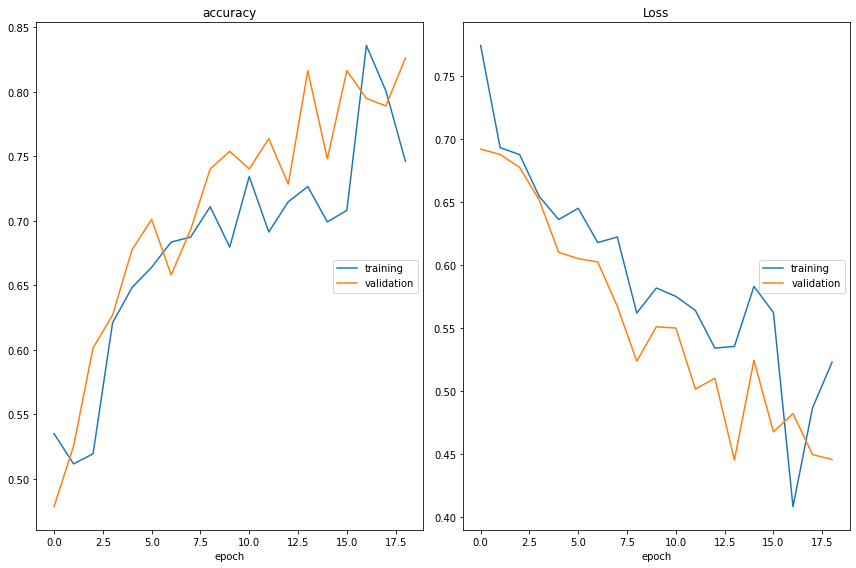

accuracy
	training         	 (min:    0.512, max:    0.836, cur:    0.746)
	validation       	 (min:    0.479, max:    0.826, cur:    0.826)
Loss
	training         	 (min:    0.408, max:    0.774, cur:    0.523)
	validation       	 (min:    0.445, max:    0.692, cur:    0.445)
8/8 [==============================] - 6s 726ms/step - loss: 0.5227 - accuracy: 0.7461 - val_loss: 0.4455 - val_accuracy: 0.8262
Epoch 19: early stopping


In [21]:
hist = model.fit_generator(
    generator=train_data,
    steps_per_epoch=8, epochs=30,verbose=1,
    validation_data=val_data,
    validation_steps=16,
    callbacks=call_back
)

In [22]:
from keras.models import load_model

model = load_model('/content/best_model.h5')

In [23]:
acc =  model.evaluate_generator(generator=test_data)[1]

In [24]:
print(f"Acc = {acc*100}")

Acc = 82.03240036964417


In [48]:
from keras.applications.mobilenet import MobileNet
from keras.layers import Input

In [60]:
inp = Input((224,224,1))
model1 = MobileNet(include_top=False)

In [61]:
#model1.summary()

In [62]:
for i in model1.layers[:-6]:
  i.trainable=False

In [63]:
from keras.layers import GlobalAveragePooling2D
X = model1.layers[-6].output
X = GlobalAveragePooling2D()(X)

output = Dense(1,activation='sigmoid')(X)

In [64]:
from keras.models import Model
model_c = Model(inputs=model1.input,outputs=output)

In [65]:
model_c.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:

es = EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=5, verbose=1, mode='auto')
mc = ModelCheckpoint(filepath='best_model_Mobile.h5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
call_back = [es,mc,PlotLossesKeras()]

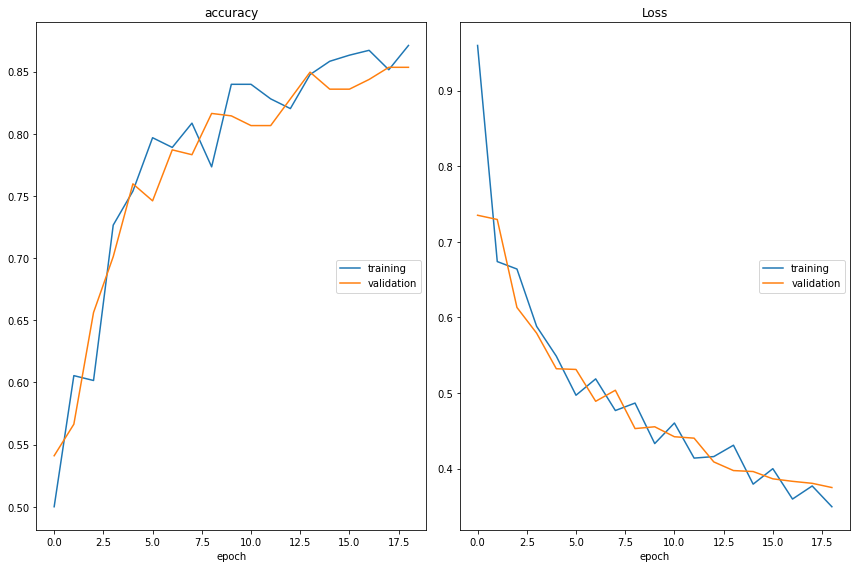

accuracy
	training         	 (min:    0.500, max:    0.871, cur:    0.871)
	validation       	 (min:    0.541, max:    0.854, cur:    0.854)
Loss
	training         	 (min:    0.350, max:    0.960, cur:    0.350)
	validation       	 (min:    0.375, max:    0.735, cur:    0.375)
8/8 [==============================] - 6s 765ms/step - loss: 0.3495 - accuracy: 0.8711 - val_loss: 0.3749 - val_accuracy: 0.8535
Epoch 19: early stopping


In [67]:
model_c.fit_generator(
    generator=train_data,
    steps_per_epoch=8, epochs=30,verbose=1,
    validation_data=val_data,
    validation_steps=16,
    callbacks=call_back

)

In [68]:
acc = model_c.evaluate_generator(test_data)

In [70]:
print(f"Acc = > {acc[1]*100}")

Acc = > 88.07069063186646
